<a href="https://colab.research.google.com/github/rskrisel/topic_modeling_workshop/blob/main/topic_modeling_tomotopy_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This curriculum is copied from [Melanie Walsh's *Introduction to Cultural Analytics & Python*](https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/09-Topic-Modeling-Without-Mallet.html). However, the dataset is different. This script uses the U.S. Inaugural Addresses corpus, which is available for download [here](https://melaniewalsh.github.io/Intro-Cultural-Analytics/_downloads/64e2547e2d86c20cc2a74f660143cfeb/US_Inaugural_Addresses.zip).

We also use `NLTK` instead of using `little_mallet_wrapper` to clean and normalize our text

# Topic Modeling — With Tomotopy

In this workshop, we're learning about a text analysis method called *topic modeling*. This method will help us identify the main topics or discourses within a collection of texts or single text that has been separated into smaller text chunks.

In this particular lesson, we're going to use [Tomotopy](https://github.com/bab2min/tomotopy) to topic model The U.S. Inaugural Addresses [zip file (.zip) of text files (.txt)](https://melaniewalsh.github.io/Intro-Cultural-Analytics/_downloads/64e2547e2d86c20cc2a74f660143cfeb/US_Inaugural_Addresses.zip) contains U.S. Inaugural Addresses ranging from President George Washington (1789) to President Donald Trump (2017). Each text file is titled with a number, the corresponding last name of the U.S. President, and the corresponding year of the Inaugural Address..

Tomotopy is a topic modeling tool that is written purely in Python.

___

## Update NLTK

In [1]:
!pip install --upgrade nltk

In [2]:
import nltk
nltk.__version__

'3.9.1'

## Install Packages

In [3]:
!pip install tomotopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 56.2 MB/s eta 0:00:00


We’re also going to pip install the data visualization library seaborn:

In [ ]:
# !pip install seaborn

## Import data from the GitHub repository
Start by cloning the repository:

In [4]:
!git clone https://github.com/rskrisel/topic_modeling_workshop

Cloning into 'topic_modeling_workshop'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 78 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (78/78), 857.58 KiB | 9.86 MiB/s, done.
Resolving deltas: 100% (2/2), done.


Navigate to the cloned repository:

In [5]:
%cd topic_modeling_workshop

/content/topic_modeling_workshop


List the contents of the repository:


In [6]:
%ls

 README.md  'topic_modeling_tomotopy_workshop (1).ipynb'   US_Inaugural_Addresses/


Let's import [`glob`](https://docs.python.org/3/library/glob.html) and use the `glob.glob()` method to make a list of all (`*`) the `.txt` files in that directory.

In [7]:
import glob
files = glob.glob("US_Inaugural_Addresses/*.txt")

In [8]:
files

['US_Inaugural_Addresses/15_polk_1845.txt',
 'US_Inaugural_Addresses/52_clinton_1993.txt',
 'US_Inaugural_Addresses/55_bush_george_w_2005.txt',
 'US_Inaugural_Addresses/31_taft_1909.txt',
 'US_Inaugural_Addresses/24_garfield_1881.txt',
 'US_Inaugural_Addresses/10_adams_john_quincy_1825.txt',
 'US_Inaugural_Addresses/45_johnson_1965.txt',
 'US_Inaugural_Addresses/12_jackson_1833.txt',
 'US_Inaugural_Addresses/23_hayes_1877.txt',
 'US_Inaugural_Addresses/54_bush_george_w_2001.txt',
 'US_Inaugural_Addresses/30_roosevelt_theodore_1905.txt',
 'US_Inaugural_Addresses/25_cleveland_1885.txt',
 'US_Inaugural_Addresses/22_grant_1873.txt',
 'US_Inaugural_Addresses/20_lincoln_1865.txt',
 'US_Inaugural_Addresses/53_clinton_1997.txt',
 'US_Inaugural_Addresses/04_jefferson_1801.txt',
 'US_Inaugural_Addresses/34_harding_1921.txt',
 'US_Inaugural_Addresses/09_monroe_1821.txt',
 'US_Inaugural_Addresses/13_van_buren_1837.txt',
 'US_Inaugural_Addresses/48_carter_1977.txt',
 'US_Inaugural_Addresses/08_monr

## Import Packages

Now let's import `tomotopy` and the data viz library `seaborn`.

We're also going to import [`pathlib`](https://docs.python.org/3/library/pathlib.html#basic-use) to stem our path names.

Finally, we will also import `pandas` to organize our data and `NLTK` to clean and normalize our text

In [9]:
import tomotopy as tp
import seaborn
import glob
from pathlib import Path
import pandas as pd
import nltk


# Download the required resources
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Get Training Data From Text Files

Before we topic model the US Innaugural Address files, we need to process the text files and prepare them for analysis. The steps below demonstrate how to process texts if your corpus is a collection of separate text files.

<div class="admonition note" name="html-admonition" style="background: lightblue; padding: 10px">
    
<p class="title">Note</p>
    
We're calling these text files our *training data*, because we're *training* our topic model with these texts. The topic model will be learning and extracting topics based on these texts.
    
</div>

Let's process our texts with the function `little_mallet_wrapper.process_string()`.

This function will take every individual text file, transform all the text to lowercase as well as remove stopwords, punctuation, and numbers, and then add the processed text to our master list `training_data`.

In [10]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import stopwords
stops = stopwords.words('english')



lemmatizer = WordNetLemmatizer()


def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()  # Get the first letter of the POS tag
    tag_dict = {
        'J': wordnet.ADJ,  # Adjective
        'N': wordnet.NOUN,  # Noun
        'V': wordnet.VERB,  # Verb
        'R': wordnet.ADV    # Adverb
    }
    return tag_dict.get(tag, wordnet.NOUN)  # Default to noun if not found

In [11]:
training_data = []
original_texts = []
titles = []


for file in files:
    text = open(file, encoding='utf-8').read()
    text_tokens = nltk.word_tokenize(text)
    nltk_text = nltk.Text(text_tokens)
    text_lower = [t.lower() for t in nltk_text if t.isalnum()]
    text_stops = [t for t in text_lower if t not in stops]
    text_clean = [WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in text_stops]
    text_string = ' '.join(text_clean)
    training_data.append(text_string)
    original_texts.append(text)
    titles.append(Path(file).stem)

In [12]:
len(training_data), len(original_texts), len(titles)

(58, 58, 58)

In [13]:
titles

['15_polk_1845',
 '52_clinton_1993',
 '55_bush_george_w_2005',
 '31_taft_1909',
 '24_garfield_1881',
 '10_adams_john_quincy_1825',
 '45_johnson_1965',
 '12_jackson_1833',
 '23_hayes_1877',
 '54_bush_george_w_2001',
 '30_roosevelt_theodore_1905',
 '25_cleveland_1885',
 '22_grant_1873',
 '20_lincoln_1865',
 '53_clinton_1997',
 '04_jefferson_1801',
 '34_harding_1921',
 '09_monroe_1821',
 '13_van_buren_1837',
 '48_carter_1977',
 '08_monroe_1817',
 '28_mckinley_1897',
 '58_trump_2017',
 '46_nixon_1969',
 '44_kennedy_1961',
 '05_jefferson_1805',
 '07_madison_1813',
 '19_lincoln_1861',
 '02_washington_1793',
 '33_wilson_1917',
 '27_cleveland_1893',
 '51_bush_george_h_w_1989',
 '56_obama_2009',
 '42_eisenhower_1953',
 '49_reagan_1981',
 '38_roosevelt_franklin_1937',
 '01_washington_1789',
 '39_roosevelt_franklin_1941',
 '41_truman_1949',
 '37_roosevelt_franklin_1933',
 '43_eisenhower_1957',
 '14_harrison_1841',
 '47_nixon_1973',
 '16_taylor_1849',
 '17_pierce_1853',
 '36_hoover_1929',
 '32_wil

## Train Topic Model

### Log-Likelihood in Machine Learning
In machine learning, log-likelihood is used to:


1.  Train models: The model adjusts itself to maximize the log-likelihood, meaning it tries to make the observed data more "likely."
2.   Evaluate models: If the log-likelihood is high (or less negative), the model fits the data well.

**For Example:**
<br> If your data consists of words in a sentence and you’re training a language model:

* Log-likelihood measures how well your model predicts the words in the sentence.
* A higher (less negative) log-likelihood means the model is better at predicting the observed words.

In [15]:
# Number of topics to return
num_topics = 8
# Numer of topic words to print out
num_topic_words = 6

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after removing white space (strip)
# and splitting it up into words (split)
for text in training_data:
    model.add_doc(text.strip().split())



# Trains the model incrementally in chunks of iterations (10 in this case), up to a total of 100 iterations.
# As the model trains, the quality of the topics (their coherence and relevance) usually improves.
# The log-likelihood function is typically used to derive the maximum likelihood estimator of the parameter
# Track log-likelihood at each iteration (as in your training loop). Stop training when the improvements become negligible.

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)  # Train the model for 10 iterations
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')  # Print the log-likelihood


print("\nTopic Model Results:\n\n")
# Print out top 10 words for each topic. Note: topic_number is just an index that identifies a particular topic in the model
topics = []
topic_individual_words = []
for topic_number in range(0, num_topics): #Loops through all the topics by their indices (topic_number), from 0 to num_topics - 1.
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words)) #Fetches the top num_topic_words for the current topic (topic_number) as a list of (word, probability) tuples.
    topics.append(topic_words) #Adds the string of top words (topic_words) for the current topic to the topics list.
    topic_individual_words.append(topic_words.split()) #Splits the space-separated string of words (topic_words) into a list of individual words.
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")

Topic Model Training...


Iteration: 0	Log-likelihood: -8.672731897803923
Iteration: 10	Log-likelihood: -8.385868440051073
Iteration: 20	Log-likelihood: -8.278431033418661
Iteration: 30	Log-likelihood: -8.244367578581622
Iteration: 40	Log-likelihood: -8.213193183592347
Iteration: 50	Log-likelihood: -8.196356822958577
Iteration: 60	Log-likelihood: -8.17565774307803
Iteration: 70	Log-likelihood: -8.161926735436772
Iteration: 80	Log-likelihood: -8.166077975928435
Iteration: 90	Log-likelihood: -8.170975652958763

Topic Model Results:


✨Topic 0✨

shall may law war people well

✨Topic 1✨

people united would power nation foreign

✨Topic 2✨

state government country constitution every interest

✨Topic 3✨

america time new american one government

✨Topic 4✨

great government congress secure time executive

✨Topic 5✨

make upon must men justice purpose

✨Topic 6✨

u world people must nation peace

✨Topic 7✨

freedom nation know work country see



## Examine Top Documents and Titles

Load topic distributions. The topic distribution indicates the probability of each topic being associated with a specific document.

In [18]:
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

# Loops through all documents in the model and applies the logic inside the list comprehension for each document.
# doc.get_topic_dist() retrieves the topic distribution for that specific document.

Make functions for displaying top documents. The `get_top_docs()` function is taken from Maria Antoniak's [Little Mallet Wrapper](https://github.com/maria-antoniak/little-mallet-wrapper/blob/c89bfbeddb11ddc2a6874476985275a7b2a6c1fd/little_mallet_wrapper/little_mallet_wrapper.py#L164)

In [22]:
from IPython.display import Markdown, display
# IPython means interactive Python. It is an interactive command-line terminal for Python.
import re
# A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern.
# RegEx can be used to check if a string contains the specified search pattern.

# Function to display Markdown text
def make_md(string):
    display(Markdown(str(string)))

# Function to get the top documents for a given topic
def get_top_docs(docs, topic_distributions, topic_index, n=5):
#     The zip() function takes iterables (can be zero or more), aggregates them in a tuple, and returns it.
# Pair topic probabilities with documents, then sort by probability (descending)
    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)
# Get topic words for the given topic
    topic_words = topics[topic_index]
    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n---")

# Display the top documents
    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return


Display top titles

In [23]:
get_top_docs(titles, topic_distributions, topic_index=0, n=6)

### ✨Topic 0✨

shall may law war people well

---

✨  
**Topic Probability**: 0.306876003742218  
**Document**: 02_washington_1793



✨  
**Topic Probability**: 0.2582307755947113  
**Document**: 26_harrison_1889



✨  
**Topic Probability**: 0.2347201108932495  
**Document**: 23_hayes_1877



✨  
**Topic Probability**: 0.22044587135314941  
**Document**: 20_lincoln_1865



✨  
**Topic Probability**: 0.21939770877361298  
**Document**: 18_buchanan_1857



✨  
**Topic Probability**: 0.21709449589252472  
**Document**: 19_lincoln_1861



In [24]:
get_top_docs(titles, topic_distributions, topic_index=1, n=5)

### ✨Topic 1✨

people united would power nation foreign

---

✨  
**Topic Probability**: 0.22394706308841705  
**Document**: 15_polk_1845



✨  
**Topic Probability**: 0.20627756416797638  
**Document**: 03_adams_john_1797



✨  
**Topic Probability**: 0.1999645233154297  
**Document**: 11_jackson_1829



✨  
**Topic Probability**: 0.1990024894475937  
**Document**: 09_monroe_1821



✨  
**Topic Probability**: 0.19871744513511658  
**Document**: 13_van_buren_1837



Display top documents with topic words bolded

In [25]:
get_top_docs(original_texts, topic_distributions, topic_index=1, n=5)

### ✨Topic 1✨

people united would power nation foreign

---

✨  
**Topic Probability**: 0.22394706308841705  
**Document**: James K. Polk	1845-03-04	Fellow-Citizens: Without solicitation on my part, I have been chosen by the free and voluntary suffrages of my countrymen to the most honorable and most responsible office on earth. I am deeply impressed with gratitude for the confidence reposed in me. Honored with this distinguished consideration at an earlier period of life than any of my predecessors, I cannot disguise the diffidence with which I am about to enter on the discharge of my official duties. If the more aged and experienced men who have filled the office of President of the United States even in the infancy of the Republic distrusted their ability to discharge the duties of that exalted station, what ought not to be the apprehensions of one so much younger and less endowed now that our domain extends from ocean to ocean, that our **people** have so greatly increased in numbers, and at a time when so great diversity of opinion prevails in regard to the principles and policy which should characterize the administration of our Government? Well may the boldest fear and the wisest tremble when incurring responsibilities on which may depend our country's peace and prosperity, and in some degree the hopes and happiness of the whole human family. In assuming responsibilities so vast I fervently invoke the aid of that Almighty Ruler of the Universe in whose hands are the destinies of nations and of men to guard this Heaven-favored land against the mischiefs which without His guidance might arise from an unwise public policy. With a firm reliance upon the wisdom of Omnipotence to sustain and direct me in the path of duty which I am appointed to pursue, I stand in the presence of this assembled multitude of my countrymen to take upon myself the solemn obligation "to the best of my ability to preserve, protect, and defend the Constitution of the United States." A concise enumeration of the principles which will guide me in the administrative policy of the Government is not only in accordance with the examples set me by all my predecessors, but is eminently befitting the occasion. The Constitution itself, plainly written as it is, the safeguard of our federative compact, the offspring of concession and compromise, binding together in the bonds of peace and union this great and increasing family of free and independent States, will be the chart by which I shall be directed. It will be my first care to administer the Government in the true spirit of that instrument, and to assume no powers not expressly granted or clearly implied in its terms. The Government of the United States is one of delegated and limited powers, and it is by a strict adherence to the clearly granted powers and by abstaining from the exercise of doubtful or unauthorized implied powers that we have the only sure guaranty against the recurrence of those unfortunate collisions between the Federal and State authorities which have occasionally so much disturbed the harmony of our system and even threatened the perpetuity of our glorious Union. "To the States, respectively, or to the **people**" have been reserved "the powers not delegated to the United States by the Constitution nor prohibited by it to the States." Each State is a complete sovereignty within the sphere of its reserved powers. The Government of the Union, acting within the sphere of its delegated authority, is also a complete sovereignty. While the General Government should abstain from the exercise of authority not clearly delegated to it, the States should be equally careful that in the maintenance of their rights they do not overstep the limits of powers reserved to them. One of the most distinguished of my predecessors attached deserved importance to "the support of the State governments in all their rights, as the most competent administration for our domestic concerns and the surest bulwark against antirepublican tendencies," and to the "preservation of the General Government in its whole constitutional vigor, as the sheet anchor of our peace at home and safety abroad." To the Government of the United States has been intrusted the exclusive management of our **foreign** affairs. Beyond that it wields a few general enumerated powers. It does not force reform on the States. It leaves individuals, over whom it casts its protecting influence, entirely free to improve their own condition by the legitimate exercise of all their mental and physical powers. It is a common protector of each and all the States; of every man who lives upon our soil, whether of native or **foreign** birth; of every religious sect, in their worship of the Almighty according to the dictates of their own conscience; of every shade of opinion, and the most free inquiry; of every art, trade, and occupation consistent with the laws of the States. And we rejoice in the general happiness, prosperity, and advancement of our country, which have been the offspring of freedom, and not of **power**. This most admirable and wisest system of well-regulated self-government among men ever devised by human minds has been tested by its successful operation for more than half a century, and if preserved from the usurpations of the Federal Government on the one hand and the exercise by the States of powers not reserved to them on the other, will, I fervently hope and believe, endure for ages to come and dispense the blessings of civil and religious liberty to distant generations. To effect objects so dear to every patriot I shall devote myself with anxious solicitude. It will be my desire to guard against that most fruitful source of danger to the harmonious action of our system which consists in substituting the mere discretion and caprice of the Executive or of majorities in the legislative department of the Government for powers which have been withheld from the Federal Government by the Constitution. By the theory of our Government majorities rule, but this right is not an arbitrary or unlimited one. It is a right to be exercised in subordination to the Constitution and in conformity to it. One great object of the Constitution was to restrain majorities from oppressing minorities or encroaching upon their just rights. Minorities have a right to appeal to the Constitution as a shield against such oppression. That the blessings of liberty which our Constitution secures may be enjoyed alike by minorities and majorities, the Executive has been wisely invested with a qualified veto upon the acts of the Legislature. It is a negative **power**, and is conservative in its character. It arrests for the time hasty, inconsiderate, or unconstitutional legislation, invites reconsideration, and transfers questions at issue between the legislative and executive departments to the tribunal of the people. Like all other powers, it is subject to be abused. When judiciously and properly exercised, the Constitution itself may be saved from infraction and the rights of all preserved and protected. The inestimable value of our Federal Union is felt and acknowledged by all. By this system of **united** and confederated States our people are permitted collectively and individually to seek their own happiness in their own way, and the consequences have been most auspicious. Since the Union was formed the number of the States has increased from thirteen to twenty-eight; two of these have taken their position as members of the Confederacy within the last week. Our population has increased from three to twenty millions. New communities and States are seeking protection under its aegis, and multitudes from the Old World are flocking to our shores to participate in its blessings. Beneath its benign sway peace and prosperity prevail. Freed from the burdens and miseries of war, our trade and intercourse have extended throughout the world. Mind, no longer tasked in devising means to accomplish or resist schemes of ambition, usurpation, or conquest, is devoting itself to man's true interests in developing his faculties and powers and the capacity of nature to minister to his enjoyments. Genius is free to announce its inventions and discoveries, and the hand is free to accomplish whatever the head conceives not incompatible with the rights of a fellow-being. All distinctions of birth or of rank have been abolished. All citizens, whether native or adopted, are placed upon terms of precise equality. All are entitled to equal rights and equal protection. No union exists between church and state, and perfect freedom of opinion is guaranteed to all sects and creeds. These are some of the blessings secured to our happy land by our Federal Union. To perpetuate them it is our sacred duty to preserve it. Who shall assign limits to the achievements of free minds and free hands under the protection of this glorious Union? No treason to mankind since the organization of society **would** be equal in atrocity to that of him who **would** lift his hand to destroy it. He would overthrow the noblest structure of human wisdom, which protects himself and his fellow-man. He would stop the progress of free government and involve his country either in anarchy or despotism. He would extinguish the fire of liberty, which warms and animates the hearts of happy millions and invites all the nations of the earth to imitate our example. If he say that error and wrong are committed in the administration of the Government, let him remember that nothing human can be perfect, and that under no other system of government revealed by Heaven or devised by man has reason been allowed so free and broad a scope to combat error. Has the sword of despots proved to be a safer or surer instrument of reform in government than enlightened reason? Does he expect to find among the ruins of this Union a happier abode for our swarming millions than they now have under it? Every lover of his country must shudder at the thought of the possibility of its dissolution, and will be ready to adopt the patriotic sentiment, "Our Federal Union--it must be preserved." To preserve it the compromises which alone enabled our fathers to form a common constitution for the government and protection of so many States and distinct communities, of such diversified habits, interests, and domestic institutions, must be sacredly and religiously observed. Any attempt to disturb or destroy these compromises, being terms of the compact of union, can lead to none other than the most ruinous and disastrous consequences. It is a source of deep regret that in some sections of our country misguided persons have occasionally indulged in schemes and agitations whose object is the destruction of domestic institutions existing in other sections--institutions which existed at the adoption of the Constitution and were recognized and protected by it. All must see that if it were possible for them to be successful in attaining their object the dissolution of the Union and the consequent destruction of our happy form of government must speedily follow. I am happy to believe that at every period of our existence as a **nation** there has existed, and continues to exist, among the great mass of our people a devotion to the Union of the States which will shield and protect it against the moral treason of any who would seriously contemplate its destruction. To secure a continuance of that devotion the compromises of the Constitution must not only be preserved, but sectional jealousies and heartburnings must be discountenanced, and all should remember that they are members of the same political family, having a common destiny. To increase the attachment of our people to the Union, our laws should be just. Any policy which shall tend to favor monopolies or the peculiar interests of sections or classes must operate to the prejudice of the interest of their fellow-citizens, and should be avoided. If the compromises of the Constitution be preserved, if sectional jealousies and heartburnings be discountenanced, if our laws be just and the Government be practically administered strictly within the limits of power prescribed to it, we may discard all apprehensions for the safety of the Union. With these views of the nature, character, and objects of the Government and the value of the Union, I shall steadily oppose the creation of those institutions and systems which in their nature tend to pervert it from its legitimate purposes and make it the instrument of sections, classes, and individuals. We need no national banks or other extraneous institutions planted around the Government to control or strengthen it in opposition to the will of its authors. Experience has taught us how unnecessary they are as auxiliaries of the public authorities--how impotent for good and how powerful for mischief. Ours was intended to be a plain and frugal government, and I shall regard it to be my duty to recommend to Congress and, as far as the Executive is concerned, to enforce by all the means within my power the strictest economy in the expenditure of the public money which may be compatible with the public interests. A national debt has become almost an institution of European monarchies. It is viewed in some of them as an essential prop to existing governments. Melancholy is the condition of that people whose government can be sustained only by a system which periodically transfers large amounts from the labor of the many to the coffers of the few. Such a system is incompatible with the ends for which our republican Government was instituted. Under a wise policy the debts contracted in our Revolution and during the War of 1812 have been happily extinguished. By a judicious application of the revenues not required for other necessary purposes, it is not doubted that the debt which has grown out of the circumstances of the last few years may be speedily paid off. I congratulate my fellow-citizens on the entire restoration of the credit of the General Government of the Union and that of many of the States. Happy would it be for the indebted States if they were freed from their liabilities, many of which were incautiously contracted. Although the Government of the Union is neither in a legal nor a moral sense bound for the debts of the States, and it would be a violation of our compact of union to assume them, yet we cannot but feel a deep interest in seeing all the States meet their public liabilities and pay off their just debts at the earliest practicable period. That they will do so as soon as it can be done without imposing too heavy burdens on their citizens there is no reason to doubt. The sound moral and honorable feeling of the people of the indebted States cannot be questioned, and we are happy to perceive a settled disposition on their part, as their acility returns after a season of unexampled pecuniary embarrassment, to pay off all just demands and to acquiesce in any reasonable measures to accomplish that object. One of the difficulties which we have had to encounter in the practical administration of the Government consists in the adjustment of our revenue laws and the levy of the taxes necessary for the support of Government. In the general proposition that no more money shall be collected than the necessities of an economical administration shall require all parties seem to acquiesce. Nor does there seem to be any material difference of opinion as to the absence of right in the Government to tax one section of country, or one class of citizens, or one occupation, for the mere profit of another. "Justice and sound policy forbid the Federal Government to foster one branch of industry to the detriment of another, or to cherish the interests of one portion to the injury of another portion of our common country." I have heretofore declared to my fellow-citizens that "in my judgment it is the duty of the Government to extend, as far as it may be practicable to do so, by its revenue laws and all other means within its power, fair and just protection to all of the great interests of the whole Union, embracing agriculture, manufactures, the mechanic arts, commerce, and navigation." I have also declared my opinion to be "in favor of a tariff for revenue," and that "in adjusting the details of such a tariff I have sanctioned such moderate discriminating duties as would produce the amount of revenue needed and at the same time afford reasonable incidental protection to our home industry," and that I was "opposed to a tariff for protection merely, and not for revenue." The power "to lay and collect taxes, duties, imposts, and excises" was an indispensable one to be conferred on the Federal Government, which without it would possess no means of providing for its own support. In executing this power by levying a tariff of duties for the support of Government, the raising of 'revenue' should be the 'object' and 'protection' the 'incident'. To reverse this principle and make 'protection' the 'object' and 'revenue' the 'incident' would be to inflict manifest injustice upon all other than the protected interests. In levying duties for revenue it is doubtless proper to make such discriminations within the 'revenue principle' as will afford incidental protection to our home interests. Within the revenue limit there is a discretion to discriminate; beyond that limit the rightful exercise of the power is not conceded. The incidental protection afforded to our home interests by discriminations within the revenue range it is believed will be ample. In making discriminations all our home interests should as far as practicable be equally protected. The largest portion of our people are agriculturists. Others are employed in manufactures, commerce, navigation, and the mechanic arts. They are all engaged in their respective pursuits and their joint labors constitute the national or home industry. To tax one branch of this home industry for the benefit of another would be unjust. No one of these interests can rightfully claim an advantage over the others, or to be enriched by impoverishing the others. All are equally entitled to the fostering care and protection of the Government. In exercising a sound discretion in levying discriminating duties within the limit prescribed, care should be taken that it be done in a manner not to benefit the wealthy few at the expense of the toiling millions by taxing 'lowest' the luxuries of life, or articles of superior quality and high price, which can only be consumed by the wealthy, and 'highest' the necessaries of life, or articles of coarse quality and low price, which the poor and great mass of our people must consume. The burdens of government should as far as practicable be distributed justly and equally among all classes of our population. These general views, long entertained on this subject, I have deemed it proper to reiterate. It is a subject upon which conflicting interests of sections and occupations are supposed to exist, and a spirit of mutual concession and compromise in adjusting its details should be cherished by every part of our widespread country as the only means of preserving harmony and a cheerful acquiescence of all in the operation of our revenue laws. Our patriotic citizens in every part of the Union will readily submit to the payment of such taxes as shall be needed for the support of their Government, whether in peace or in war, if they are so levied as to distribute the burdens as equally as possible among them. The Republic of Texas has made known her desire to come into our Union, to form a part of our Confederacy and enjoy with us the blessings of liberty secured and guaranteed by our Constitution. Texas was once a part of our country--was unwisely ceded away to a foreign power--is now independent, and possesses an undoubted right to dispose of a part or the whole of her territory and to merge her sovereignty as a separate and independent state in ours. I congratulate my country that by an act of the late Congress of the United States the assent of this Government has been given to the reunion, and it only remains for the two countries to agree upon the terms to consummate an object so important to both. I regard the question of annexation as belonging exclusively to the United States and Texas. They are independent powers competent to contract, and foreign nations have no right to interfere with them or to take exceptions to their reunion. Foreign powers do not seem to appreciate the true character of our Government. Our Union is a confederation of independent States, whose policy is peace with each other and all the world. To enlarge its limits is to extend the dominions of peace over additional territories and increasing millions. The world has nothing to fear from military ambition in our Government. While the Chief Magistrate and the popular branch of Congress are elected for short terms by the suffrages of those millions who must in their own persons bear all the burdens and miseries of war, our Government cannot be otherwise than pacific. Foreign powers should therefore look on the annexation of Texas to the United States not as the conquest of a **nation** seeking to extend her dominions by arms and violence, but as the peaceful acquisition of a territory once her own, by adding another member to our confederation, with the consent of that member, thereby diminishing the chances of war and opening to them new and ever-increasing markets for their products. To Texas the reunion is important, because the strong protecting arm of our Government would be extended over her, and the vast resources of her fertile soil and genial climate would be speedily developed, while the safety of New Orleans and of our whole southwestern frontier against hostile aggression, as well as the interests of the whole Union, would be promoted by it. In the earlier stages of our national existence the opinion prevailed with some that our system of confederated States could not operate successfully over an extended territory, and serious objections have at different times been made to the enlargement of our boundaries. These objections were earnestly urged when we acquired Louisiana. Experience has shown that they were not well founded. The title of numerous Indian tribes to vast tracts of country has been extinguished; new States have been admitted into the Union; new Territories have been created and our jurisdiction and laws extended over them. As our population has expanded, the Union has been cemented and strengthened. As our boundaries have been enlarged and our agricultural population has been spread over a large surface, our federative system has acquired additional strength and security. It may well be doubted whether it would not be in greater danger of overthrow if our present population were confined to the comparatively narrow limits of the original thirteen States than it is now that they are sparsely settled over a more expanded territory. It is confidently believed that our system may be safely extended to the utmost bounds of our territorial limits, and that as it shall be extended the bonds of our Union, so far from being weakened, will become stronger. None can fail to see the danger to our safety and future peace if Texas remains an independent state or becomes an ally or dependency of some foreign nation more powerful than herself. Is there one among our citizens who would not prefer perpetual peace with Texas to occasional wars, which so often occur between bordering independent nations? Is there one who would not prefer free intercourse with her to high duties on all our products and manufactures which enter her ports or cross her frontiers? Is there one who would not prefer an unrestricted communication with her citizens to the frontier obstructions which must occur if she remains out of the Union? Whatever is good or evil in the local institutions of Texas will remain her own whether annexed to the United States or not. None of the present States will be responsible for them any more than they are for the local institutions of each other. They have confederated together for certain specified objects. Upon the same principle that they would refuse to form a perpetual union with Texas because of her local institutions our forefathers would have been prevented from forming our present Union. Perceiving no valid objection to the measure and many reasons for its adoption vitally affecting the peace, the safety, and the prosperity of both countries, I shall on the broad principle which formed the basis and produced the adoption of our Constitution, and not in any narrow spirit of sectional policy, endeavor by all constitutional, honorable, and appropriate means to consummate the expressed will of the people and Government of the United States by the reannexation of Texas to our Union at the earliest practicable period. Nor will it become in a less degree my duty to assert and maintain by all constitutional means the right of the United States to that portion of our territory which lies beyond the Rocky Mountains. Our title to the country of the Oregon is "clear and unquestionable," and already are our people preparing to perfect that title by occupying it with their wives and children. But eighty years ago our population was confined on the west by the ridge of the Alleghanies. Within that period--within the lifetime, I might say, of some of my hearers--our people, increasing to many millions, have filled the eastern valley of the Mississippi, adventurously ascended the Missouri to its headsprings, and are already engaged in establishing the blessings of self-government in valleys of which the rivers flow to the Pacific. The world beholds the peaceful triumphs of the industry of our emigrants. To us belongs the duty of protecting them adequately wherever they may be upon our soil. The jurisdiction of our laws and the benefits of our republican institutions should be extended over them in the distant regions which they have selected for their homes. The increasing facilities of intercourse will easily bring the States, of which the formation in that part of our territory cannot be long delayed, within the sphere of our federative Union. In the meantime every obligation imposed by treaty or conventional stipulations should be sacredly respected. In the management of our foreign relations it will be my aim to observe a careful respect for the rights of other nations, while our own will be the subject of constant watchfulness. Equal and exact justice should characterize all our intercourse with foreign countries. All alliances having a tendency to jeopard the welfare and honor of our country or sacrifice any one of the national interests will be studiously avoided, and yet no opportunity will be lost to cultivate a favorable understanding with foreign governments by which our navigation and commerce may be extended and the ample products of our fertile soil, as well as the manufactures of our skillful artisans, find a ready market and remunerating prices in foreign countries. In taking "care that the laws be faithfully executed," a strict performance of duty will be exacted from all public officers. From those officers, especially, who are charged with the collection and disbursement of the public revenue will prompt and rigid accountability be required. Any culpable failure or delay on their part to account for the moneys intrusted to them at the times and in the manner required by law will in every instance terminate the official connection of such defaulting officer with the Government. Although in our country the Chief Magistrate must almost of necessity be chosen by a party and stand pledged to its principles and measures, yet in his official action he should not be the President of a part only, but of the whole people of the United States. While he executes the laws with an impartial hand, shrinks from no proper responsibility, and faithfully carries out in the executive department of the Government the principles and policy of those who have chosen him, he should not be unmindful that our fellow-citizens who have differed with him in opinion are entitled to the full and free exercise of their opinions and judgments, and that the rights of all are entitled to respect and regard. Confidently relying upon the aid and assistance of the coordinate departments of the Government in conducting our public affairs, I enter upon the discharge of the high duties which have been assigned me by the people, again humbly supplicating that Divine Being who has watched over and protected our beloved country from its infancy to the present hour to continue His gracious benedictions upon us, that we may continue to be a prosperous and happy people."



✨  
**Topic Probability**: 0.20627756416797638  
**Document**: John Adams	1797-03-04	WHEN it was first perceived, in early times, that no middle course for America remained between unlimited submission to a **foreign** legislature and a total independence of its claims, men of reflection were less apprehensive of danger from the formidable **power** of fleets and armies they must determine to resist than from those contests and dissensions which **would** certainly arise concerning the forms of government to be instituted over the whole and over the parts of this extensive country. Relying, however, on the purity of their intentions, the justice of their cause, and the integrity and intelligence of the **people**, under an overruling Providence which had so signally protected this country from the first, the representatives of this **nation**, then consisting of little more than half its present number, not only broke to pieces the chains which were forging and the rod of iron that was lifted up, but frankly cut asunder the ties which had bound them, and launched into an ocean of uncertainty The zeal and ardor of the **people** during the Revolutionary war, supplying the place of government, commanded a degree of order sufficient at least for the temporary preservation of society. The Confederation which was early felt to be necessary was prepared from the models of the Batavian and Helvetic confederacies, the only examples which remain with any detail and precision in history, and certainly the only ones which the people at large had ever considered. But reflecting on the striking difference in so many particulars between this country and those where a courier may go from the seat of government to the frontier in a single day, it was then certainly foreseen by some who assisted in Congress at the formation of it that it could not be durable Negligence of its regulations, inattention to its recommendations, if not disobedience to its authority, not only in individuals but in States, soon appeared with their melancholy consequences &#151; universal languor, jealousies and rivalries of States, decline of navigation and commerce, discouragement of necessary manufactures, universal fall in the value of lands and their produce, contempt of public and private faith, loss of consideration and credit with **foreign** nations, and at length in discontents, animosities, combinations, partial conventions, and insurrection, threatening some great national calamity In this dangerous crisis the people of America were not abandoned by their usual good sense, presence of mind, resolution, or integrity. Measures were pursued to concert a plan to form a more perfect union, establish justice, insure domestic tranquillity, provide for the common defense, promote the general welfare, and secure the blessings of liberty. The public disquisitions, discussions, and deliberations issued in the present happy Constitution of Government Employed in the service of my country abroad during the whole course of these transactions, I first saw the Constitution of the United States in a foreign country. Irritated by no literary altercation, animated by no public debate, heated by no party animosity, I read it with great satisfaction, as the result of good heads prompted by good hearts, as an experiment better adapted to the genius, character, situation, and relations of this **nation** and country than any which had ever been proposed or suggested. In its general principles and great outlines it was conformable to such a system of government as I had ever most esteemed, and in some States, my own native State in particular, had contributed to establish. Claiming a right of suffrage, in common with my fellow-citizens, in the adoption or rejection of a constitution which was to rule me and my posterity, as well as them and theirs, I did not hesitate to express my approbation of it on all occasions, in public and in private. It was not then, nor has been since, any objection to it in my mind that the Executive and Senate were not more permanent. Nor have I ever entertained a thought of promoting any alteration in it but such as the people themselves, in the course of their experience, should see and feel to be necessary or expedient, and by their representatives in Congress and the State legislatures, according to the Constitution itself, adopt and ordain Returning to the bosom of my country after a painful separation from it for ten years, I had the honor to be elected to a station under the new order of things, and I have repeatedly laid myself under the most serious obligations to support the Constitution. The operation of it has equaled the most sanguine expectations of its friends, and from an habitual attention to it, satisfaction in its administration, and delight in its effects upon the peace, order, prosperity, and happiness of the nation I have acquired an habitual attachment to it and veneration for it What other form of government, indeed, can so well deserve our esteem and love?There may be little solidity in an ancient idea that congregations of men into cities and nations are the most pleasing objects in the sight of superior intelligences, but this is very certain, that to a benevolent human mind there can be no spectacle presented by any nation more pleasing, more noble, majestic, or august, than an assembly like that which has so often been seen in this and the other Chamber of Congress, of a Government in which the Executive authority, as well as that of all the branches of the Legislature, are exercised by citizens selected at regular periods by their neighbors to make and execute laws for the general good. Can anything essential, anything more than mere ornament and decoration, be added to this by robes and diamonds? Can authority be more amiable and respectable when it descends from accidents or institutions established in remote antiquity than when it springs fresh from the hearts and judgments of an honest and enlightened people? For it is the people only that are represented. It is their **power** and majesty that is reflected, and only for their good, in every legitimate government, under whatever form it may appear. The existence of such a government as ours for any length of time is a full proof of a general dissemination of knowledge and virtue throughout the whole body of the people. And what object or consideration more pleasing than this can be presented to the human mind? If national pride is ever justifiable or excusable it is when it springs, not from power or riches, grandeur or glory, but from conviction of national innocence, information, and benevolence In the midst of these pleasing ideas we should be unfaithful to ourselves if we should ever lose sight of the danger to our liberties if anything partial or extraneous should infect the purity of our free, fair, virtuous, and independent elections. If an election is to be determined by a majority of a single vote, and that can be procured by a party through artifice or corruption, the Government may be the choice of a party for its own ends, not of the nation for the national good. If that solitary suffrage can be obtained by foreign nations by flattery or menaces, by fraud or violence, by terror, intrigue, or venality, the Government may not be the choice of the American people, but of foreign nations. It may be foreign nations who govern us, and not we, the people, who govern ourselves; and candid men will acknowledge that in such cases choice **would** have little advantage to boast of over lot or chance Such is the amiable and interesting system of government (and such are some of the abuses to which it may be exposed) which the people of America have exhibited to the admiration and anxiety of the wise and virtuous of all nations for eight years under the administration of a citizen who, by a long course of great actions, regulated by prudence, justice, temperance, and fortitude, conducting a people inspired with the same virtues and animated with the same ardent patriotism and love of liberty to independence and peace, to increasing wealth and unexampled prosperity, has merited the gratitude of his fellow-citizens, commanded the highest praises of foreign nations, and secured immortal glory with posterity In that retirement which is his voluntary choice may he long live to enjoy the delicious recollection of his services, the gratitude of mankind, the happy fruits of them to himself and the world, which are daily increasing, and that splendid prospect of the future fortunes of this country which is opening from year to year. His name may be still a rampart, and the knowledge that he lives a bulwark, against all open or secret enemies of his country's peace. This example has been recommended to the imitation of his successors by both Houses of Congress and by the voice of the legislatures and the people throughout the nation On this subject it might become me better to be silent or to speak with diffidence; but as something may be expected, the occasion, I hope, will be admitted as an apology if I venture to say that if a preference, upon principle, of a free republican government, formed upon long and serious reflection, after a diligent and impartial inquiry after truth; if an attachment to the Constitution of the United States, and a conscientious determination to support it until it shall be altered by the judgments and wishes of the people, expressed in the mode prescribed in it; if a respectful attention to the constitutions of the individual States and a constant caution and delicacy toward the State governments; if an equal and impartial regard to the rights, interest, honor, and happiness of all the States in the Union, without preference or regard to a northern or southern, an eastern or western, position, their various political opinions on unessential points or their personal attachments; if a love of virtuous men of all parties and denominations; if a love of science and letters and a wish to patronize every rational effort to encourage schools, colleges, universities, academies, and every institution for propagating knowledge, virtue, and religion among all classes of the people, not only for their benign influence on the happiness of life in all its stages and classes, and of society in all its forms, but as the only means of preserving our Constitution from its natural enemies, the spirit of sophistry, the spirit of party, the spirit of intrigue, the profligacy of corruption, and the pestilence of foreign influence, which is the angel of destruction to elective governments; if a love of equal laws, of justice, and humanity in the interior administration; if an inclination to improve agriculture, commerce, and manufacturers for necessity, convenience, and defense; if a spirit of equity and humanity toward the aboriginal nations of America, and a disposition to meliorate their condition by inclining them to be more friendly to us, and our citizens to be more friendly to them; if an inflexible determination to maintain peace and inviolable faith with all nations, and that system of neutrality and impartiality among the belligerent powers of Europe which has been adopted by this Government and so solemnly sanctioned by both Houses of Congress and applauded by the legislatures of the States and the public opinion, until it shall be otherwise ordained by Congress; if a personal esteem for the French nation, formed in a residence of seven years chiefly among them, and a sincere desire to preserve the friendship which has been so much for the honor and interest of both nations; if, while the conscious honor and integrity of the people of America and the internal sentiment of their own power and energies must be preserved, an earnest endeavor to investigate every just cause and remove every colorable pretense of complaint; if an intention to pursue by amicable negotiation a reparation for the injuries that have been committed on the commerce of our fellow-citizens by whatever nation, and if success cannot be obtained, to lay the facts before the Legislature, that they may consider what further measures the honor and interest of the Government and its constituents demand; if a resolution to do justice as far as may depend upon me, at all times and to all nations, and maintain peace, friendship, and benevolence with all the world; if an unshaken confidence in the honor, spirit, and resources of the American people, on which I have so often hazarded my all and never been deceived; if elevated ideas of the high destinies of this country and of my own duties toward it, founded on a knowledge of the moral principles and intellectual improvements of the people deeply engraven on my mind in early life, and not obscured but exalted by experience and age; and, with humble reverence, I feel it to be my duty to add, if a veneration for the religion of a people who profess and call themselves Christians, and a fixed resolution to consider a decent respect for Christianity among the best recommendations for the public service, can enable me in any degree to comply with your wishes, it shall be my strenuous endeavor that this sagacious injunction of the two Houses shall not be without effect With this great example before me, with the sense and spirit, the faith and honor, the duty and interest, of the same American people pledged to support the Constitution of the United States, I entertain no doubt of its continuance in all its energy, and my mind is prepared without hesitation to lay myself under the most solemn obligations to support it to the utmost of my power And may that Being who is supreme over all, the Patron of Order, the Fountain of Justice, and the Protector in all ages of the world of virtuous liberty, continue His blessing upon this nation and its Government and give it all possible success and duration consistent with the ends of His providence.



✨  
**Topic Probability**: 0.1999645233154297  
**Document**: Andrew Jackson	1829-03-04	Fellow-Citizens About to undertake the arduous duties that I have been appointed to perform by the choice of a free **people**, I avail myself of this customary and solemn occasion to express the gratitude which their confidence inspires and to acknowledge the accountability which my situation enjoins. While the magnitude of their interests convinces me that no thanks can be adequate to the honor they have conferred, it admonishes me that the best return I can make is the zealous dedication of my humble abilities to their service and their good As the instrument of the Federal Constitution it will devolve on me for a stated period to execute the laws of the United States, to superintend their **foreign** and their confederate relations, to manage their revenue, to command their forces, and, by communications to the Legislature, to watch over and to promote their interests generally. And the principles of action by which I shall endeavor to accomplish this circle of duties it is now proper for me briefly to explain In administering the laws of Congress I shall keep steadily in view the limitations as well as the extent of the Executive **power**, trusting thereby to discharge the functions of my office without transcending its authority. With **foreign** nations it will be my study to preserve peace and to cultivate friendship on fair and honorable terms, and in the adjustment of any differences that may exist or arise to exhibit the forbearance becoming a powerful **nation** rather than the sensibility belonging to a gallant **people** In such measures as I may be called on to pursue in regard to the rights of the separate States I hope to be animated by a proper respect for those sovereign members of our Union, taking care not to confound the powers they have reserved to themselves with those they have granted to the Confederacy The management of the public revenue--that searching operation in all governments--is among the most delicate and important trusts in ours, and it will, of course, demand no inconsiderable share of my official solicitude. Under every aspect in which it can be considered it **would** appear that advantage must result from the observance of a strict and faithful economy. This I shall aim at the more anxiously both because it will facilitate the extinguishment of the national debt, the unnecessary duration of which is incompatible with real independence, and because it will counteract that tendency to public and private profligacy which a profuse expenditure of money by the Government is but too apt to engender. Powerful auxiliaries to the attainment of this desirable end are to be found in the regulations provided by the wisdom of Congress for the specific appropriation of public money and the prompt accountability of public officers With regard to a proper selection of the subjects of impost with a view to revenue, it **would** seem to me that the spirit of equity, caution, and compromise in which the Constitution was formed requires that the great interests of agriculture, commerce, and manufactures should be equally favored, and that perhaps the only exception to this rule should consist in the peculiar encouragement of any products of either of them that may be found essential to our national independence Internal improvement and the diffusion of knowledge, so far as they can be promoted by the constitutional acts of the Federal Government, are of high importance Considering standing armies as dangerous to free governments in time of peace, I shall not seek to enlarge our present establishment, nor disregard that salutary lesson of political experience which teaches that the military should be held subordinate to the civil **power**. The gradual increase of our Navy, whose flag has displayed in distant climes our skill in navigation and our fame in arms; the preservation of our forts, arsenals, and dockyards, and the introduction of progressive improvements in the discipline and science of both branches of our military service are so plainly prescribed by prudence that I should be excused for omitting their mention sooner than for enlarging on their importance. But the bulwark of our defense is the national militia, which in the present state of our intelligence and population must render us invincible. As long as our Government is administered for the good of the people, and is regulated by their will; as long as it secures to us the rights of person and of property, liberty of conscience and of the press, it will be worth defending; and so long as it is worth defending a patriotic militia will cover it with an impenetrable aegis. Partial injuries and occasional mortifications we may be subjected to, but a million of armed freemen, possessed of the means of war, can never be conquered by a foreign foe. To any just system, therefore, calculated to strengthen this natural safeguard of the country I shall cheerfully lend all the aid in my power It will be my sincere and constant desire to observe toward the Indian tribes within our limits a just and liberal policy, and to give that humane and considerate attention to their rights and their wants which is consistent with the habits of our Government and the feelings of our people The recent demonstration of public sentiment inscribes on the list of Executive duties, in characters too legible to be overlooked, the task of 'reform', which will require particularly the correction of those abuses that have brought the patronage of the Federal Government into conflict with the freedom of elections, and the counteraction of those causes which have disturbed the rightful course of appointment and have placed or continued power in unfaithful or incompetent hands In the performance of a task thus generally delineated I shall endeavor to select men whose diligence and talents will insure in their respective stations able and faithful cooperation, depending for the advancement of the public service more on the integrity and zeal of the public officers than on their numbers A diffidence, perhaps too just, in my own qualifications will teach me to look with reverence to the examples of public virtue left by my illustrious predecessors, and with veneration to the lights that flow from the mind that founded and the mind that reformed our system. The same diffidence induces me to hope for instruction and aid from the coordinate branches of the Government, and for the indulgence and support of my fellow-citizens generally. And a firm reliance on the goodness of that Power whose providence mercifully protected our national infancy, and has since upheld our liberties in various vicissitudes, encourages me to offer up my ardent supplications that He will continue to make our beloved country the object of His divine care and gracious benediction.



✨  
**Topic Probability**: 0.1990024894475937  
**Document**: James Monroe	1821-03-04	Fellow-Citizens I shall not attempt to describe the grateful emotions which the new and very distinguished proof of the confidence of my fellow-citizens, evinced by my reelection to this high trust, has excited in my bosom. The approbation which it announces of my conduct in the preceding term affords me a consolation which I shall profoundly feel through life. The general accord with which it has been expressed adds to the great and never-ceasing obligations which it imposes. To merit the continuance of this good opinion, and to carry it with me into my retirement as the solace of advancing years, will be the object of my most zealous and unceasing efforts Having no pretensions to the high and commanding claims of my predecessors, whose names are so much more conspicuously identified with our Revolution, and who contributed so preeminently to promote its success, I consider myself rather as the instrument than the cause of the union which has prevailed in the late election. In surmounting, in favor of my humble pretensions, the difficulties which so often produce division in like occurrences, it is obvious that other powerful causes, indicating the great strength and stability of our Union, have essentially contributed to draw you together. That these powerful causes exist, and that they are permanent, is my fixed opinion; that they may produce a like accord in all questions touching, however remotely, the liberty, prosperity, and happiness of our country will always be the object of my most fervent prayers to the Supreme Author of All Good In a government which is founded by the **people**, who possess exclusively the sovereignty, it seems proper that the person who may be placed by their suffrages in this high trust should declare on commencing its duties the principles on which he intends to conduct the Administration. If the person thus elected has served the preceding term, an opportunity is afforded him to review its principal occurrences and to give such further explanation respecting them as in his judgment may be useful to his constituents. The events of one year have influence on those of another, and, in like manner, of a preceding on the succeeding Administration. The movements of a great **nation** are connected in all their parts. If errors have been committed they ought to be corrected; if the policy is sound it ought to be supported. It is by a thorough knowledge of the whole subject that our fellow-citizens are enabled to judge correctly of the past and to give a proper direction to the future Just before the commencement of the last term the United States had concluded a war with a very powerful **nation** on conditions equal and honorable to both parties. The events of that war are too recent and too deeply impressed on the memory of all to require a development from me. Our commerce had been in a great measure driven from the sea, our Atlantic and inland frontiers were invaded in almost every part; the waste of life along our coast and on some parts of our inland frontiers, to the defense of which our gallant and patriotic citizens were called, was immense, in addition to which not less than $120,000,000 were added at its end to the public debt As soon as the war had terminated, the nation, admonished by its events, resolved to place itself in a situation which should be better calculated to prevent the recurrence of a like evil, and, in case it should recur, to mitigate its calamities. With this view, after reducing our land force to the basis of a peace establishment, which has been further modified since, provision was made for the construction of fortifications at proper points through the whole extent of our coast and such an augmentation of our naval force as should be well adapted to both purposes. The laws making this provision were passed in 1815 and 1816, and it has been since the constant effort of the Executive to carry them into effect The advantage of these fortifications and of an augmented naval force in the extent contemplated, in a point of economy, has been fully illustrated by a report of the Board of Engineers and Naval Commissioners lately communicated to Congress, by which it appears that in an invasion by 20,000 men, with a correspondent naval force, in a campaign of six months only, the whole expense of the construction of the works **would** be defrayed by the difference in the sum necessary to maintain the force which **would** be adequate to our defense with the aid of those works and that which would be incurred without them. The reason of this difference is obvious. If fortifications are judiciously placed on our great inlets, as distant from our cities as circumstances will permit, they will form the only points of attack, and the enemy will be detained there by a small regular force a sufficient time to enable our militia to collect and repair to that on which the attack is made. A force adequate to the enemy, collected at that single point, with suitable preparation for such others as might be menaced, is all that would be requisite. But if there were no fortifications, then the enemy might go where he pleased, and, changing his position and sailing from place to place, our force must be called out and spread in vast numbers along the whole coast and on both sides of every bay and river as high up in each as it might be navigable for ships of war. By these fortifications, supported by our Navy, to which they would afford like support, we should present to other powers an armed front from St. Croix to the Sabine, which would protect in the event of war our whole coast and interior from invasion; and even in the wars of other powers, in which we were neutral, they would be found eminently useful, as, by keeping their public ships at a distance from our cities, peace and order in them would be preserved and the Government be protected from insult It need scarcely be remarked that these measures have not been resorted to in a spirit of hostility to other powers. Such a disposition does not exist toward any **power**. Peace and good will have been, and will hereafter be, cultivated with all, and by the most faithful regard to justice. They have been dictated by a love of peace, of economy, and an earnest desire to save the lives of our fellow-citizens from that destruction and our country from that devastation which are inseparable from war when it finds us unprepared for it. It is believed, and experience has shown, that such a preparation is the best expedient that can be resorted to prevent war. I add with much pleasure that considerable progress has already been made in these measures of defense, and that they will be completed in a few years, considering the great extent and importance of the object, if the plan be zealously and steadily persevered in The conduct of the Government in what relates to **foreign** powers is always an object of the highest importance to the nation. Its agriculture, commerce, manufactures, fisheries, revenue, in short, its peace, may all be affected by it. Attention is therefore due to this subject At the period adverted to the powers of Europe, after having been engaged in long and destructive wars with each other, had concluded a peace, which happily still exists. Our peace with the **power** with whom we had been engaged had also been concluded. The war between Spain and the colonies in South America, which had commenced many years before, was then the only conflict that remained unsettled. This being a contest between different parts of the same community, in which other powers had not interfered, was not affected by their accommodations This contest was considered at an early stage by my predecessor a civil war in which the parties were entitled to equal rights in our ports. This decision, the first made by any power, being formed on great consideration of the comparative strength and resources of the parties, the length of time, and successful opposition made by the colonies, and of all other circumstances on which it ought to depend, was in strict accord with the law of nations. Congress has invariably acted on this principle, having made no change in our relations with either party. Our attitude has therefore been that of neutrality between them, which has been maintained by the Government with the strictest impartiality. No aid has been afforded to either, nor has any privilege been enjoyed by the one which has not been equally open to the other party, and every exertion has been made in its power to enforce the execution of the laws prohibiting illegal equipments with equal rigor against both By this equality between the parties their public vessels have been received in our ports on the same footing; they have enjoyed an equal right to purchase and export arms, munitions of war, and every other supply, the exportation of all articles whatever being permitted under laws which were passed long before the commencement of the contest; our citizens have traded equally with both, and their commerce with each has been alike protected by the Government Respecting the attitude which it may be proper for the United States to maintain hereafter between the parties, I have no hesitation in stating it as my opinion that the neutrality heretofore observed should still be adhered to. From the change in the Government of Spain and the negotiation now depending, invited by the Cortes and accepted by the colonies, it may be presumed, that their differences will be settled on the terms proposed by the colonies. Should the war be continued, the United States, regarding its occurrences, will always have it in their power to adopt such measures respecting it as their honor and interest may require Shortly after the general peace a band of adventurers took advantage of this conflict and of the facility which it afforded to establish a system of buccaneering in the neighboring seas, to the great annoyance of the commerce of the United States, and, as was represented, of that of other powers. Of this spirit and of its injurious bearing on the United States strong proofs were afforded by the establishment at Amelia Island, and the purposes to which it was made instrumental by this band in 1817, and by the occurrences which took place in other parts of Florida in 1818, the details of which in both instances are too well known to require to be now recited. I am satisfied had a less decisive course been adopted that the worst consequences would have resulted from it. We have seen that these checks, decisive as they were, were not sufficient to crush that piratical spirit. Many culprits brought within our limits have been condemned to suffer death, the punishment due to that atrocious crime. The decisions of upright and enlightened tribunals fall equally on all whose crimes subject them, by a fair interpretation of the law, to its censure. It belongs to the Executive not to suffer the executions under these decisions to transcend the great purpose for which punishment is necessary. The full benefit of example being secured, policy as well as humanity equally forbids that they should be carried further. I have acted on this principle, pardoning those who appear to have been led astray by ignorance of the criminality of the acts they had committed, and suffering the law to take effect on those only in whose favor no extenuating circumstances could be urged Great confidence is entertained that the late treaty with Spain, which has been ratified by both the parties, and the ratifications whereof have been exchanged, has placed the relations of the two countries on a basis of permanent friendship. The provision made by it for such of our citizens as have claims on Spain of the character described will, it is presumed, be very satisfactory to them, and the boundary which is established between the territories of the parties westward of the Mississippi, heretofore in dispute, has, it is thought, been settled on conditions just and advantageous to both. But to the acquisition of Florida too much importance cannot be attached. It secures to the United States a territory important in itself, and whose importance is much increased by its bearing on many of the highest interests of the Union. It opens to several of the neighboring States a free passage to the ocean, through the Province ceded, by several rivers, having their sources high up within their limits. It secures us against all future annoyance from powerful Indian tribes. It gives us several excellent harbors in the Gulf of Mexico for ships of war of the largest size. It covers by its position in the Gulf the Mississippi and other great waters within our extended limits, and thereby enables the United States to afford complete protection to the vast and very valuable productions of our whole Western country, which find a market through those streams By a treaty with the British Government, bearing date on the 20th of October, 1818, the convention regulating the commerce between the United States and Great Britain, concluded on the 3d of July, 1815, which was about expiring, was revived and continued for the term of ten years from the time of its expiration. By that treaty, also, the differences which had arisen under the treaty of Ghent respecting the right claimed by the United States for their citizens to take and cure fish on the coast of His Britannic Majesty's dominions in America, with other differences on important interests, were adjusted to the satisfaction of both parties. No agreement has yet been entered into respecting the commerce between the United States and the British dominions in the West Indies and on this continent. The restraints imposed on that commerce by Great Britain, and reciprocated by the United States on a principle of defense, continue still in force The negotiation with France for the regulation of the commercial relations between the two countries, which in the course of the last summer had been commenced at Paris, has since been transferred to this city, and will be pursued on the part of the United States in the spirit of conciliation, and with an earnest desire that it may terminate in an arrangement satisfactory to both parties Our relations with the Barbary Powers are preserved in the same state and by the same means that were employed when I came into this office. As early as 1801 it was found necessary to send a squadron into the Mediterranean for the protection of our commerce, and no period has intervened, a short term excepted, when it was thought advisable to withdraw it. The great interests which the United States have in the Pacific, in commerce and in the fisheries, have also made it necessary to maintain a naval force there. In disposing of this force in both instances the most effectual measures in our power have been taken, without interfering with its other duties, for the suppression of the slave trade and of piracy in the neighboring seas The situation of the United States in regard to their resources, the extent of their revenue, and the facility with which it is raised affords a most gratifying spectacle. The payment of nearly $67,000,000 of the public debt, with the great progress made in measures of defense and in other improvements of various kinds since the late war, are conclusive proofs of this extraordinary prosperity, especially when it is recollected that these expenditures have been defrayed without a burthen on the **people**, the direct tax and excise having been repealed soon after the conclusion of the late war, and the revenue applied to these great objects having been raised in a manner not to be felt. Our great resources therefore remain untouched for any purpose which may affect the vital interests of the nation. For all such purposes they are inexhaustible. They are more especially to be found in the virtue, patriotism, and intelligence of our fellow-citizens, and in the devotion with which they would yield up by any just measure of taxation all their property in support of the rights and honor of their country Under the present depression of prices, affecting all the productions of the country and every branch of industry, proceeding from causes explained on a former occasion, the revenue has considerably diminished, the effect of which has been to compel Congress either to abandon these great measures of defense or to resort to loans or internal taxes to supply the deficiency. On the presumption that this depression and the deficiency in the revenue arising from it would be temporary, loans were authorized for the demands of the last and present year. Anxious to relieve my fellow-citizens in 1817 from every burthen which could be dispensed with, and the state of the Treasury permitting it, I recommended the repeal of the internal taxes, knowing that such relief was then peculiarly necessary in consequence of the great exertions made in the late war. I made that recommendation under a pledge that should the public exigencies require a recurrence to them at any time while I remained in this trust, I would with equal promptitude perform the duty which would then be alike incumbent on me. By the experiment now making it will be seen by the next session of Congress whether the revenue shall have been so augmented as to be adequate to all these necessary purposes. Should the deficiency still continue, and especially should it be probable that it would be permanent, the course to be pursued appears to me to be obvious. I am satisfied that under certain circumstances loans may be resorted to with great advantage. I am equally well satisfied, as a general rule, that the demands of the current year, especially in time of peace, should be provided for by the revenue of that year I have never dreaded, nor have I ever shunned, in any situation in which I have been placed making appeals to the virtue and patriotism of my fellow-citizens, well knowing that they could never be made in vain, especially in times of great emergency or for purposes of high national importance. Independently of the exigency of the case, many considerations of great weight urge a policy having in view a provision of revenue to meet to a certain extent the demands of the nation, without relying altogether on the precarious resource of **foreign** commerce. I am satisfied that internal duties and excises, with corresponding imposts on foreign articles of the same kind, would, without imposing any serious burdens on the people, enhance the price of produce, promote our manufactures, and augment the revenue, at the same time that they made it more secure and permanent The care of the Indian tribes within our limits has long been an essential part of our system, but, unfortunately, it has not been executed in a manner to accomplish all the objects intended by it. We have treated them as independent nations, without their having any substantial pretensions to that rank. The distinction has flattered their pride, retarded their improvement, and in many instances paved the way to their destruction. The progress of our settlements westward, supported as they are by a dense population, has constantly driven them back, with almost the total sacrifice of the lands which they have been compelled to abandon. They have claims on the magnanimity and, I may add, on the justice of this nation which we must all feel. We should become their real benefactors; we should perform the office of their Great Father, the endearing title which they emphatically give to the Chief Magistrate of our Union. Their sovereignty over vast territories should cease, in lieu of which the right of soil should be secured to each individual and his posterity in competent portions; and for the territory thus ceded by each tribe some reasonable equivalent should be granted, to be vested in permanent funds for the support of civil government over them and for the education of their children, for their instruction in the arts of husbandry, and to provide sustenance for them until they could provide it for themselves. My earnest hope is that Congress will digest some plan, founded on these principles, with such improvements as their wisdom may suggest, and carry it into effect as soon as it may be practicable Europe is again unsettled and the prospect of war increasing. Should the flame light up in any quarter, how far it may extend it is impossible to foresee. It is our peculiar felicity to be altogether unconnected with the causes which produce this menacing aspect elsewhere. With every power we are in perfect amity, and it is our interest to remain so if it be practicable on just conditions. I see no reasonable cause to apprehend variance with any power, unless it proceed from a violation of our maritime rights. In these contests, should they occur, and to whatever extent they may be carried, we shall be neutral; but as a neutral power we have rights which it is our duty to maintain. For like injuries it will be incumbent on us to seek redress in a spirit of amity, in full confidence that, injuring none, none would knowingly injure us. For more imminent dangers we should be prepared, and it should always be recollected that such preparation adapted to the circumstances and sanctioned by the judgment and wishes of our constituents cannot fail to have a good effect in averting dangers of every kind. We should recollect also that the season of peace is best adapted to these preparations If we turn our attention, fellow-citizens, more immediately to the internal concerns of our country, and more especially to those on which its future welfare depends, we have every reason to anticipate the happiest results. It is now rather more than forty-four years since we declared our independence, and thirty-seven since it was acknowledged. The talents and virtues which were displayed in that great struggle were a sure presage of all that has since followed. A people who were able to surmount in their infant state such great perils would be more competent as they rose into manhood to repel any which they might meet in their progress. Their physical strength would be more adequate to foreign danger, and the practice of self-government, aided by the light of experience, could not fail to produce an effect equally salutary on all those questions connected with the internal organization. These favorable anticipations have been realized In our whole system, national and State, we have shunned all the defects which unceasingly preyed on the vitals and destroyed the ancient Republics. In them there were distinct orders, a nobility and a people, or the people governed in one assembly. Thus, in the one instance there was a perpetual conflict between the orders in society for the ascendency, in which the victory of either terminated in the overthrow of the government and the ruin of the state; in the other, in which the people governed in a body, and whose dominions seldom exceeded the dimensions of a county in one of our States, a tumultuous and disorderly movement permitted only a transitory existence. In this great nation there is but one order, that of the people, whose power, by a peculiarly happy improvement of the representative principle, is transferred from them, without impairing in the slightest degree their sovereignty, to bodies of their own creation, and to persons elected by themselves, in the full extent necessary for all the purposes of free, enlightened and efficient government. The whole system is elective, the complete sovereignty being in the people, and every officer in every department deriving his authority from and being responsible to them for his conduct Our career has corresponded with this great outline. Perfection in our organization could not have been expected in the outset either in the National or State Governments or in tracing the line between their respective powers. But no serious conflict has arisen, nor any contest but such as are managed by argument and by a fair appeal to the good sense of the people, and many of the defects which experience had clearly demonstrated in both Governments have been remedied. By steadily pursuing this course in this spirit there is every reason to believe that our system will soon attain the highest degree of perfection of which human institutions are capable, and that the movement in all its branches will exhibit such a degree of order and harmony as to command the admiration and respect of the civilized world Our physical attainments have not been less eminent. Twenty-five years ago the river Mississippi was shut up and our Western brethren had no outlet for their commerce. What has been the progress since that time? The river has not only become the property of the United States from its source to the ocean, with all its tributary streams (with the exception of the upper part of the Red River only), but Louisiana, with a fair and liberal boundary on the western side and the Floridas on the eastern, have been ceded to us. The United States now enjoy the complete and uninterrupted sovereignty over the whole territory from St. Croix to the Sabine. New States, settled from among ourselves in this and in other parts, have been admitted into our Union in equal participation in the national sovereignty with the original States. Our population has augmented in an astonishing degree and extended in every direction. We now, fellow-citizens, comprise within our limits the dimensions and faculties of a great power under a Government possessing all the energies of any government ever known to the Old World, with an utter incapacity to oppress the people Entering with these views the office which I have just solemnly sworn to execute with fidelity and to the utmost of my ability, I derive great satisfaction from a knowledge that I shall be assisted in the several Departments by the very enlightened and upright citizens from whom I have received so much aid in the preceding term. With full confidence in the continuance of that candor and generous indulgence from my fellow-citizens at large which I have heretofore experienced, and with a firm reliance on the protection of Almighty God, I shall forthwith commence the duties of the high trust to which you have called me.



✨  
**Topic Probability**: 0.19871744513511658  
**Document**: Martin Van Buren	1837-03-04	Fellow-Citizens: The practice of all my predecessors imposes on me an obligation I cheerfully fulfill--to accompany the first and solemn act of my public trust with an avowal of the principles that will guide me in performing it and an expression of my feelings on assuming a charge so responsible and vast. In imitating their example I tread in the footsteps of illustrious men, whose superiors it is our happiness to believe are not found on the executive calendar of any country. Among them we recognize the earliest and firmest pillars of the Republic--those by whom our national independence was first declared, him who above all others contributed to establish it on the field of battle, and those whose expanded intellect and patriotism constructed, improved, and perfected the inestimable institutions under which we live. If such men in the position I now occupy felt themselves overwhelmed by a sense of gratitude for this the highest of all marks of their country's confidence, and by a consciousness of their inability adequately to discharge the duties of an office so difficult and exalted, how much more must these considerations affect one who can rely on no such claims for favor or forbearance! Unlike all who have preceded me, the Revolution that gave us existence as one **people** was achieved at the period of my birth; and whilst I contemplate with grateful reverence that memorable event, I feel that I belong to a later age and that I may not expect my countrymen to weigh my actions with the same kind and partial hand. So sensibly, fellow-citizens, do these circumstances press themselves upon me that I should not dare to enter upon my path of duty did I not look for the generous aid of those who will be associated with me in the various and coordinate branches of the Government; did I not repose with unwavering reliance on the patriotism, the intelligence, and the kindness of a **people** who never yet deserted a public servant honestly laboring their cause; and, above all, did I not permit myself humbly to hope for the sustaining support of an ever-watchful and beneficent Providence. To the confidence and consolation derived from these sources it **would** be ungrateful not to add those which spring from our present fortunate condition. Though not altogether exempt from embarrassments that disturb our tranquillity at home and threaten it abroad, yet in all the attributes of a great, happy, and flourishing people we stand without a parallel in the world. Abroad we enjoy the respect and, with scarcely an exception, the friendship of every **nation**; at home, while our Government quietly but efficiently performs the sole legitimate end of political institutions--in doing the greatest good to the greatest number--we present an aggregate of human prosperity surely not elsewhere to be found. How imperious, then, is the obligation imposed upon every citizen, in his own sphere of action, whether limited or extended, to exert himself in perpetuating a condition of things so singularly happy! All the lessons of history and experience must be lost upon us if we are content to trust alone to the peculiar advantages we happen to possess. Position and climate and the bounteous resources that nature has scattered with so liberal a hand--even the diffused intelligence and elevated character of our people--will avail us nothing if we fail sacredly to uphold those political institutions that were wisely and deliberately formed with reference to every circumstance that could preserve or might endanger the blessings we enjoy. The thoughtful framers of our Constitution legislated for our country as they found it. Looking upon it with the eyes of statesmen and patriots, they saw all the sources of rapid and wonderful prosperity; but they saw also that various habits, opinions, and institutions peculiar to the various portions of so vast a region were deeply fixed. Distinct sovereignties were in actual existence, whose cordial union was essential to the welfare and happiness of all. Between many of them there was, at least to some extent, a real diversity of interests, liable to be exaggerated through sinister designs; they differed in size, in population, in wealth, and in actual and prospective resources and **power**; they varied in the character of their industry and staple productions, and [in some] existed domestic institutions which, unwisely disturbed, might endanger the harmony of the whole. Most carefully were all these circumstances weighed, and the foundations of the new Government laid upon principles of reciprocal concession and equitable compromise. The jealousies which the smaller States might entertain of the **power** of the rest were allayed by a rule of representation confessedly unequal at the time, and designed forever to remain so. A natural fear that the broad scope of general legislation might bear upon and unwisely control particular interests was counteracted by limits strictly drawn around the action of the Federal authority, and to the people and the States was left unimpaired their sovereign power over the innumerable subjects embraced in the internal government of a just republic, excepting such only as necessarily appertain to the concerns of the whole confederacy or its intercourse as a **united** community with the other nations of the world. This provident forecast has been verified by time. Half a century, teeming with extraordinary events, and elsewhere producing astonishing results, has passed along, but on our institutions it has left no injurious mark. From a small community we have risen to a people powerful in numbers and in strength; but with our increase has gone hand in hand the progress of just principles. The privileges, civil and religious, of the humblest individual are still sacredly protected at home, and while the valor and fortitude of our people have removed far from us the slightest apprehension of **foreign** power, they have not yet induced us in a single instance to forget what is right. Our commerce has been extended to the remotest nations; the value and even nature of our productions have been greatly changed; a wide difference has arisen in the relative wealth and resources of every portion of our country; yet the spirit of mutual regard and of faithful adherence to existing compacts has continued to prevail in our councils and never long been absent from our conduct. We have learned by experience a fruitful lesson--that an implicit and undeviating adherence to the principles on which we set out can carry us prosperously onward through all the conflicts of circumstances and vicissitudes inseparable from the lapse of years. The success that has thus attended our great experiment is in itself a sufficient cause for gratitude, on account of the happiness it has actually conferred and the example it has unanswerably given. But to me, my fellow-citizens, looking forward to the far-distant future with ardent prayers and confiding hopes, this retrospect presents a ground for still deeper delight. It impresses on my mind a firm belief that the perpetuity of our institutions depends upon ourselves; that if we maintain the principles on which they were established they are destined to confer their benefits on countless generations yet to come, and that America will present to every friend of mankind the cheering proof that a popular government, wisely formed, is wanting in no element of endurance or strength. Fifty years ago its rapid failure was boldly predicted. Latent and uncontrollable causes of dissolution were supposed to exist even by the wise and good, and not only did unfriendly or speculative theorists anticipate for us the fate of past republics, but the fears of many an honest patriot overbalanced his sanguine hopes. Look back on these forebodings, not hastily but reluctantly made, and see how in every instance they have completely failed. An imperfect experience during the struggles of the Revolution was supposed to warrant the belief that the people **would** not bear the taxation requisite to discharge an immense public debt already incurred and to pay the necessary expenses of the Government. The cost of two wars has been paid, not only without a murmur, but with unequaled alacrity. No one is now left to doubt that every burden will be cheerfully borne that may be necessary to sustain our civil institutions or guard our honor or welfare. Indeed, all experience has shown that the willingness of the people to contribute to these ends in cases of emergency has uniformly outrun the confidence of their representatives. In the early stages of the new Government, when all felt the imposing influence as they recognized the unequaled services of the first President, it was a common sentiment that the great weight of his character could alone bind the discordant materials of our Government together and save us from the violence of contending factions. Since his death nearly forty years are gone. Party exasperation has been often carried to its highest point; the virtue and fortitude of the people have sometimes been greatly tried; yet our system, purified and enhanced in value by all it has encountered, still preserves its spirit of free and fearless discussion, blended with unimpaired fraternal feeling. The capacity of the people for self-government, and their willingness, from a high sense of duty and without those exhibitions of coercive power so generally employed in other countries, to submit to all needful restraints and exactions of municipal law, have also been favorably exemplified in the history of the American States. Occasionally, it is true, the ardor of public sentiment, outrunning the regular progress of the judicial tribunals or seeking to reach cases not denounced as criminal by the existing law, has displayed itself in a manner calculated to give pain to the friends of free government and to encourage the hopes of those who wish for its overthrow. These occurrences, however, have been far less frequent in our country than in any other of equal population on the globe, and with the diffusion of intelligence it may well be hoped that they will constantly diminish in frequency and violence. The generous patriotism and sound common sense of the great mass of our fellow-citizens will assuredly in time produce this result; for as every assumption of illegal power not only wounds the majesty of the law, but furnishes a pretext for abridging the liberties of the people, the latter have the most direct and permanent interest in preserving the landmarks of social order and maintaining on all occasions the inviolability of those constitutional and legal provisions which they themselves have made. In a supposed unfitness of our institutions for those hostile emergencies which no country can always avoid their friends found a fruitful source of apprehension, their enemies of hope. While they foresaw less promptness of action than in governments differently formed, they overlooked the far more important consideration that with us war could never be the result of individual or irresponsible will, but must be a measure of redress for injuries sustained, voluntarily resorted to by those who were to bear the necessary sacrifice, who would consequently feel an individual interest in the contest, and whose energy would be commensurate with the difficulties to be encountered. Actual events have proved their error; the last war, far from impairing, gave new confidence to our Government, and amid recent apprehensions of a similar conflict we saw that the energies of our country would not be wanting in ample season to vindicate its rights. We may not possess, as we should not desire to possess, the extended and ever-ready military organization of other nations; we may occasionally suffer in the outset for the want of it; but among ourselves all doubt upon this great point has ceased, while a salutary experience will prevent a contrary opinion from inviting aggression from abroad. Certain danger was foretold from the extension of our territory, the multiplication of States, and the increase of population. Our system was supposed to be adapted only to boundaries comparatively narrow. These have been widened beyond conjecture; the members of our Confederacy are already doubled, and the numbers of our people are incredibly augmented. The alleged causes of danger have long surpassed anticipation, but none of the consequences have followed. The power and influence of the Republic have arisen to a height obvious to all mankind; respect for its authority was not more apparent at its ancient than it is at its present limits; new and inexhaustible sources of general prosperity have been opened; the effects of distance have been averted by the inventive genius of our people, developed and fostered by the spirit of our institutions; and the enlarged variety and amount of interests, productions, and pursuits have strengthened the chain of mutual dependence and formed a circle of mutual benefits too apparent ever to be overlooked. In justly balancing the powers of the Federal and State authorities difficulties nearly insurmountable arose at the outset and subsequent collisions were deemed inevitable. Amid these it was scarcely believed possible that a scheme of government so complex in construction could remain uninjured. From time to time embarrassments have certainly occurred; but how just is the confidence of future safety imparted by the knowledge that each in succession has been happily removed! Overlooking partial and temporary evils as inseparable from the practical operation of all human institutions, and looking only to the general result, every patriot has reason to be satisfied. While the Federal Government has successfully performed its appropriate functions in relation to **foreign** affairs and concerns evidently national, that of every State has remarkably improved in protecting and developing local interests and individual welfare; and if the vibrations of authority have occasionally tended too much toward one or the other, it is unquestionably certain that the ultimate operation of the entire system has been to strengthen all the existing institutions and to elevate our whole country in prosperity and renown. The last, perhaps the greatest, of the prominent sources of discord and disaster supposed to lurk in our political condition was the institution of domestic slavery. Our forefathers were deeply impressed with the delicacy of this subject, and they treated it with a forbearance so evidently wise that in spite of every sinister foreboding it never until the present period disturbed the tranquillity of our common country. Such a result is sufficient evidence of the justice and the patriotism of their course; it is evidence not to be mistaken that an adherence to it can prevent all embarrassment from this as well as from every other anticipated cause of difficulty or danger. Have not recent events made it obvious to the slightest reflection that the least deviation from this spirit of forbearance is injurious to every interest, that of humanity included? Amidst the violence of excited passions this generous and fraternal feeling has been sometimes disregarded; and standing as I now do before my countrymen, in this high place of honor and of trust, I cannot refrain from anxiously invoking my fellow-citizens never to be deaf to its dictates. Perceiving before my election the deep interest this subject was beginning to excite, I believed it a solemn duty fully to make known my sentiments in regard to it, and now, when every motive for misrepresentation has passed away, I trust that they will be candidly weighed and understood. At least they will be my standard of conduct in the path before me. I then declared that if the desire of those of my countrymen who were favorable to my election was gratified "I must go into the Presidential chair the inflexible and uncompromising opponent of every attempt on the part of Congress to abolish slavery in the District of Columbia against the wishes of the slaveholding States, and also with a determination equally decided to resist the slightest interference with it in the States where it exists." I submitted also to my fellow-citizens, with fullness and frankness, the reasons which led me to this determination. The result authorizes me to believe that they have been approved and are confided in by a majority of the people of the United States, including those whom they most immediately affect. It now only remains to add that no bill conflicting with these views can ever receive my constitutional sanction. These opinions have been adopted in the firm belief that they are in accordance with the spirit that actuated the venerated fathers of the Republic, and that succeeding experience has proved them to be humane, patriotic, expedient, honorable, and just. If the agitation of this subject was intended to reach the stability of our institutions, enough has occurred to show that it has signally failed, and that in this as in every other instance the apprehensions of the timid and the hopes of the wicked for the destruction of our Government are again destined to be disappointed. Here and there, indeed, scenes of dangerous excitement have occurred, terrifying instances of local violence have been witnessed, and a reckless disregard of the consequences of their conduct has exposed individuals to popular indignation; but neither masses of the people nor sections of the country have been swerved from their devotion to the bond of union and the principles it has made sacred. It will be ever thus. Such attempts at dangerous agitation may periodically return, but with each the object will be better understood. That predominating affection for our political system which prevails throughout our territorial limits, that calm and enlightened judgment which ultimately governs our people as one vast body, will always be at hand to resist and control every effort, foreign or domestic, which aims or would lead to overthrow our institutions. What can be more gratifying than such a retrospect as this? We look back on obstacles avoided and dangers overcome, on expectations more than realized and prosperity perfectly secured. To the hopes of the hostile, the fears of the timid, and the doubts of the anxious actual experience has given the conclusive reply. We have seen time gradually dispel every unfavorable foreboding and our Constitution surmount every adverse circumstance dreaded at the outset as beyond control. Present excitement will at all times magnify present dangers, but true philosophy must teach us that none more tireatening than the past can remain to be overcome; and we ought (for we have just reason) to entertain an abiding confidence in the stability of our institutions and an entire conviction that if administered in the true form, character, and spirit in which they were established they are abundantly adequate to preserve to us and our children the rich blessings already derived from them, to make our beloved land for a thousand generations that chosen spot where happiness springs from a perfect equality of political rights. For myself, therefore, I desire to declare that the principle that will govern me in the high duty to which my country calls me is a strict adherence to the letter and spirit of the Constitution as it was designed by those who framed it. Looking back to it as a sacred instrument carefully and not easily framed; remembering that it was throughout a work of concession and compromise; viewing it as limited to national objects; regarding it as leaving to the people and the States all power not explicitly parted with, I shall endeavor to preserve, protect, and defend it by anxiously referring to its provision for direction in every action. To matters of domestic concernment which it has intrusted to the Federal Government and to such as relate to our intercourse with foreign nations I shall zealously devote myself; beyond those limits I shall never pass. To enter on this occasion into a further or more minute exposition of my views on the various questions of domestic policy would be as obtrusive as it is probably unexpected. Before the suffrages of my countrymen were conferred upon me I submitted to them, with great precision, my opinions on all the most prominent of these subjects. Those opinions I shall endeavor to carry out with my utmost ability. Our course of foreign policy has been so uniform and intelligible as to constitute a rule of Executive conduct which leaves little to my discretion, unless, indeed, I were willing to run counter to the lights of experience and the known opinions of my constituents. We sedulously cultivate the friendship of all nations as the conditions most compatible with our welfare and the principles of our Government. We decline alliances as adverse to our peace. We desire commercial relations on equal terms, being ever willing to give a fair equivalent for advantages received. We endeavor to conduct our intercourse with openness and sincerity, promptly avowing our objects and seeking to establish that mutual frankness which is as beneficial in the dealings of nations as of men. We have no disposition and we disclaim all right to meddle in disputes, whether internal or foreign, that may molest other countries, regarding them in their actual state as social communities, and preserving a strict neutrality in all their controversies. Well knowing the tried valor of our people and our exhaustless resources, we neither anticipate nor fear any designed aggression; and in the consciousness of our own just conduct we feel a security that we shall never be called upon to exert our determination never to permit an invasion of our rights without punishment or redress. In approaching, then, in the presence of my assembled countrymen, to make the solemn promise that yet remains, and to pledge myself that I will faithfully execute the office I am about to fill, I bring with me a settled purpose to maintain the institutions of my country, which I trust will atone for the errors I commit. In receiving from the people the sacred trust twice confided to my illustrious predecessor, and which he has discharged so faithfully and so well, I know that I cannot expect to perform the arduous task with equal ability and success. But **united** as I have been in his counsels, a daily witness of his exclusive and unsurpassed devotion to his country's welfare, agreeing with him in sentiments which his countrymen have warmly supported, and permitted to partake largely of his confidence, I may hope that somewhat of the same cheering approbation will be found to attend upon my path. For him I but express with my own the wishes of all, that he may yet long live to enjoy the brilliant evening of his well-spent life; and for myself, conscious of but one desire, faithfully to serve my country, I throw myself without fear on its justice and its kindness. Beyond that I only look to the gracious protection of the Divine Being whose strengthening support I humbly solicit, and whom I fervently pray to look down upon us all. May it be among the dispensations of His providence to bless our beloved country with honors and with length of days. May her ways be ways of pleasantness and all her paths be peace!"





## Heatmap

Make a heatmap. This function is taken from Maria Antoniak's [Little Mallet Wrapper](https://github.com/maria-antoniak/little-mallet-wrapper/blob/c89bfbeddb11ddc2a6874476985275a7b2a6c1fd/little_mallet_wrapper/little_mallet_wrapper.py#L171)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
#     The zip() function takes iterables (can be zero or more), aggregates them in a tuple, and returns it.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    if output_path:
        plt.savefig(output_path)
    plt.show()

In [ ]:
target_labels = titles

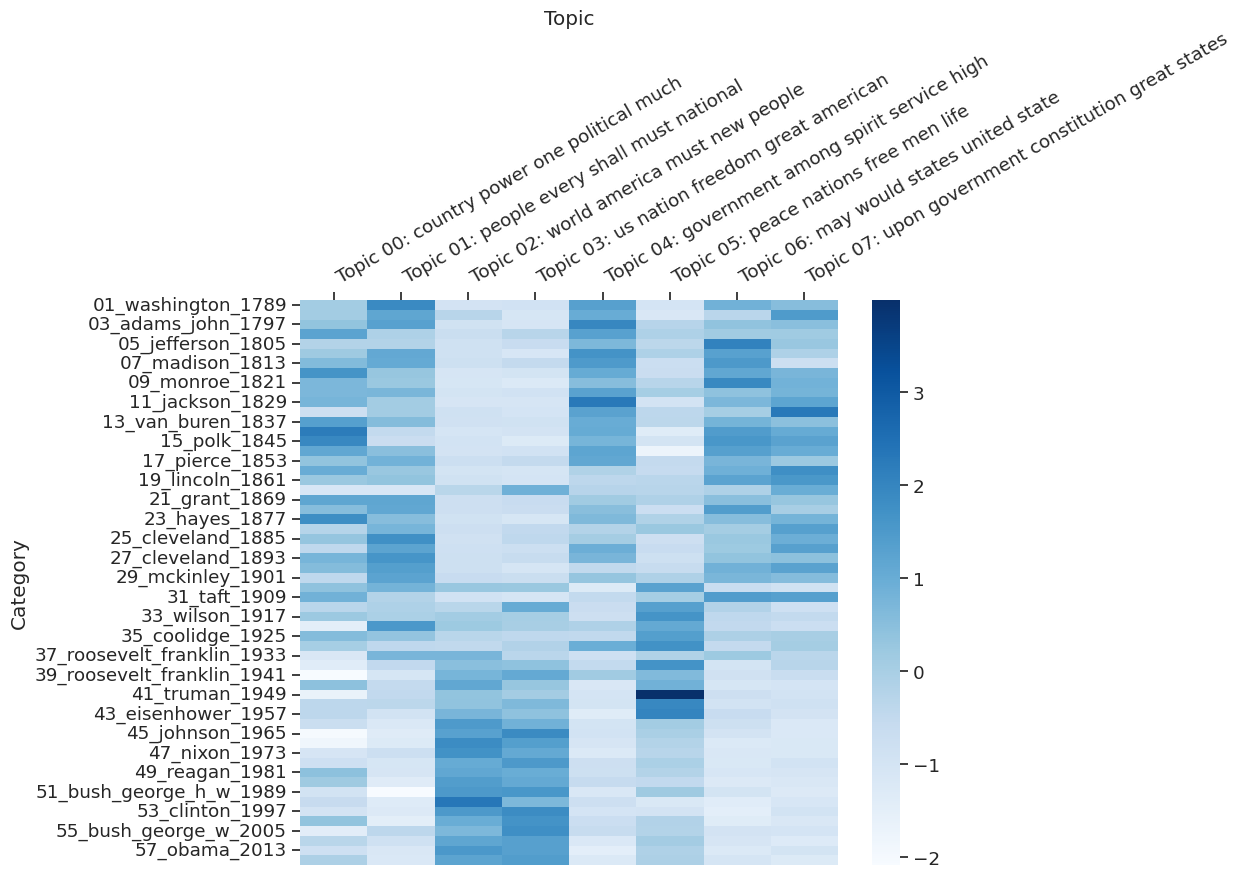

In [ ]:
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Blues',
                                 dim=(12,9))
# For all possible color maps, see https://matplotlib.org/stable/tutorials/colors/colormaps.html#miscellaneous

## Output a CSV File

In [27]:
topic_results = []
for title, topic_distribution in zip(titles, topic_distributions):
    topic_results.append({'document': title, 'topic_distribution': topic_distribution})

df = pd.DataFrame(topic_results)
column_names = [f"Topic {number} {' '.join(topic[:4])}" for number, topic in enumerate(topic_individual_words)]
df[column_names] = pd.DataFrame(df['topic_distribution'].tolist(), index = df.index)
df = df.drop('topic_distribution', axis='columns')

In [28]:
df

,document,Topic 0 shall may law war,Topic 1 people united would power,Topic 2 state government country constitution,Topic 3 america time new american,Topic 4 great government congress secure,Topic 5 make upon must men,Topic 6 u world people must,Topic 7 freedom nation know work
0,15_polk_1845,0.121240,0.223947,0.348924,0.021211,0.110351,0.075523,0.050836,0.047968
1,52_clinton_1993,0.044001,0.022209,0.034325,0.323887,0.017140,0.088812,0.319871,0.149754
2,55_bush_george_w_2005,0.072180,0.065968,0.067615,0.277819,0.027560,0.076922,0.182704,0.229232
3,31_taft_1909,0.201812,0.059388,0.177809,0.043065,0.269608,0.156322,0.038316,0.053680
4,24_garfield_1881,0.186460,0.100699,0.238440,0.055885,0.123759,0.111501,0.094941,0.088315
5,10_adams_john_quincy_1825,0.147128,0.172358,0.315409,0.048834,0.117492,0.079115,0.072061,0.047603
6,45_johnson_1965,0.034504,0.008259,0.047622,0.327779,0.018106,0.167917,0.239419,0.156395
7,12_jackson_1833,0.106615,0.186660,0.342580,0.039221,0.098440,0.090336,0.081975,0.054172
8,23_hayes_1877,0.234720,0.124618,0.249155,0.016592,0.165595,0.099016,0.062464,0.047840
9,54_bush_george_w_2001,0.057714,0.007250,0.082943,0.310174,0.018387,0.077592,0.237595,0.208345


In [ ]:
df.sort_values(by='Topic 3 us nation freedom great', ascending=False)[:6] #replace with updated topic name

,document,Topic 0 country power one political,Topic 1 people every shall must,Topic 2 world america must new,Topic 3 us nation freedom great,Topic 4 government among spirit service,Topic 5 peace nations free men,Topic 6 may would states united,Topic 7 upon government constitution great
42,45_johnson_1965,0.035936,0.063291,0.323282,0.332444,0.061326,0.127456,0.040979,0.015286
1,53_clinton_1997,0.076024,0.067288,0.352311,0.329506,0.058030,0.079821,0.001581,0.035440
5,55_bush_george_w_2005,0.057742,0.108749,0.243483,0.323468,0.076749,0.118384,0.040046,0.031379
33,54_bush_george_w_2001,0.126363,0.057966,0.282083,0.313830,0.071223,0.120443,0.009702,0.018390
54,51_bush_george_h_w_1989,0.077056,0.027845,0.352187,0.304098,0.052198,0.138584,0.038214,0.009818
56,48_carter_1977,0.081456,0.075048,0.290452,0.297939,0.069342,0.125801,0.023260,0.036703


In [29]:
df.to_csv('Topic-Distributions.csv', encoding='utf-8', index=False)